<a href="https://colab.research.google.com/github/rana-ta/2025_GP_21/blob/main/GP_LR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. Importing Needed packages

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import joblib

###2. Load the dataset

In [22]:
df = pd.read_csv('Health_data.csv')

###3. Exploratory data analysis

In [23]:
#Displaying the First 5 Rows of the Dataset
df.head()

,pulse,body temperature,SpO2,Status
0,70,36.0,99,0
1,70,36.0,98,0
2,70,36.0,97,0
3,70,36.0,96,0
4,70,36.1,100,0


In [24]:
# Check the Shape of the Dataset
df.shape

(5909, 4)

In [25]:
# Check Data Types
df.dtypes

,0
pulse,int64
body temperature,float64
SpO2,int64
Status,int64


In [26]:
# Get Information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pulse             5909 non-null   int64  
 1   body temperature  5909 non-null   float64
 2   SpO2              5909 non-null   int64  
 3   Status            5909 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 184.8 KB


###4. Explore Status variable

In [27]:
df['Status'].value_counts()

,count
Status,
2,2510
1,2400
0,999


###5. Merge classes

In [28]:
df['Status'] = df['Status'].apply(lambda x: 0 if x in [0,1] else 1)
df['Status'].value_counts()

,count
Status,
0,3399
1,2510


###6. Missing values


In [29]:
df.isnull().sum()

,0
pulse,0
body temperature,0
SpO2,0
Status,0


###7. Declare feature vector and target variable


In [30]:
X = df[['pulse' , 'body temperature' , 'SpO2']]
y = df['Status']

###8. Split data into separate training and test set

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42, stratify=y)

In [32]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4727, 3) (1182, 3)
(4727,) (1182,)


### 9. Normalize the data

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###10. Logistic Regression Model

In [34]:
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42, solver='liblinear')

###11. Predections

In [35]:
y_pred = model.predict(X_test_scaled)

###12. Evaluation

In [36]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))


Accuracy:  0.988155668358714
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       680
           1       0.99      0.98      0.99       502

    accuracy                           0.99      1182
   macro avg       0.99      0.99      0.99      1182
weighted avg       0.99      0.99      0.99      1182

Confusion Matrix: 
 [[674   6]
 [  8 494]]


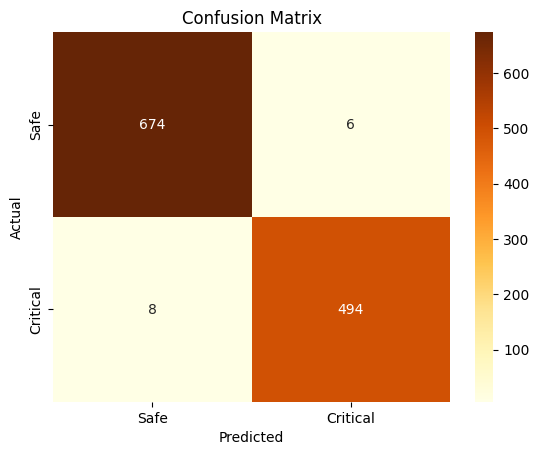

In [37]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,cmap="YlOrBr", fmt='d',
            xticklabels=["Safe", "Critical"],
            yticklabels=["Safe", "Critical"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [43]:
test_data = pd.DataFrame({
    "pulse": [75, 88, 95, 110, 130, 65, 55, 105, 92, 120],
    "body temperature": [36.8, 37.2, 37.8, 38.4, 39.2, 36.5, 36.3, 38.0, 37.6, 39.0],
    "SpO2": [98, 96, 94, 91, 88, 99, 97, 89, 95, 90]
})

X_test_scaled = scaler.transform(test_data)



In [44]:
predictions = model.predict(X_test_scaled)


In [45]:
test_data["Predicted_Status"] = predictions
test_data["Meaning"] = test_data["Predicted_Status"].map({0: "Normal", 1: "Abnormal"})
print(test_data)

   pulse  body temperature  SpO2  Predicted_Status   Meaning
0     75              36.8    98                 0    Normal
1     88              37.2    96                 0    Normal
2     95              37.8    94                 1  Abnormal
3    110              38.4    91                 1  Abnormal
4    130              39.2    88                 1  Abnormal
5     65              36.5    99                 0    Normal
6     55              36.3    97                 0    Normal
7    105              38.0    89                 1  Abnormal
8     92              37.6    95                 0    Normal
9    120              39.0    90                 1  Abnormal


###13. Save Model to use it in FireBase

In [47]:
#saving the trained model
with open ("health_status_model.pkl","wb") as f:
  pickle.dump(model,f)

print("Model saved successfully!")

Model saved successfully!


In [48]:
#saving the scaler
#To scale live sensors readings before passing it to the model

with open ("scaler.pkl","wb") as f:
  pickle.dump(scaler,f)

print("Scaler saved successfully!")


Scaler saved successfully!
